# Bonus Track Assignment #2 - How much can you remember?

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# function to extract number from string
def number_from_string(string):
    n = ""
    for i in (string):
        if i.isdigit():
            n = n + i
    return n

In [128]:
# Function that takes in input an image (a matrix) and the proportion of pixels to be distorted (d)

def distort_image(im, d):
    if d < 0 or d > 1:
        print("Out-of-bound proportion: going to default 0.05")
        d = 0.05     # if d is out of the valid range [0,1], set a default value of 0.05.


    imd = np.copy(im)    #copy of the input image
    indx = np.random.permutation(len(imd.ravel()))   #permutation of the indices of the flattened copy image
    todist = indx[:round(len(indx) * d)]     #select a subset of the indices to be distorted (the first d %)
    imd.flat[todist] = -imd.flat[todist]     #apply the distortion to the selected pixels

    return imd   #return the distorted image

In [129]:
# calculate discrepancy
def disc(reconstructed_img, input_img):
#measure ofdiscrepancy (calculate the number of pixel that differ between the reconstructed image and the input pattern)
    d = 0
    input = input_img.T.ravel()
    for i in range(len(reconstructed_img.T.ravel())):
        if reconstructed_img.T.ravel()[i] != input[i]:
            d = d+1
    discrepancy = d / len(reconstructed_img.T.ravel())
    return discrepancy

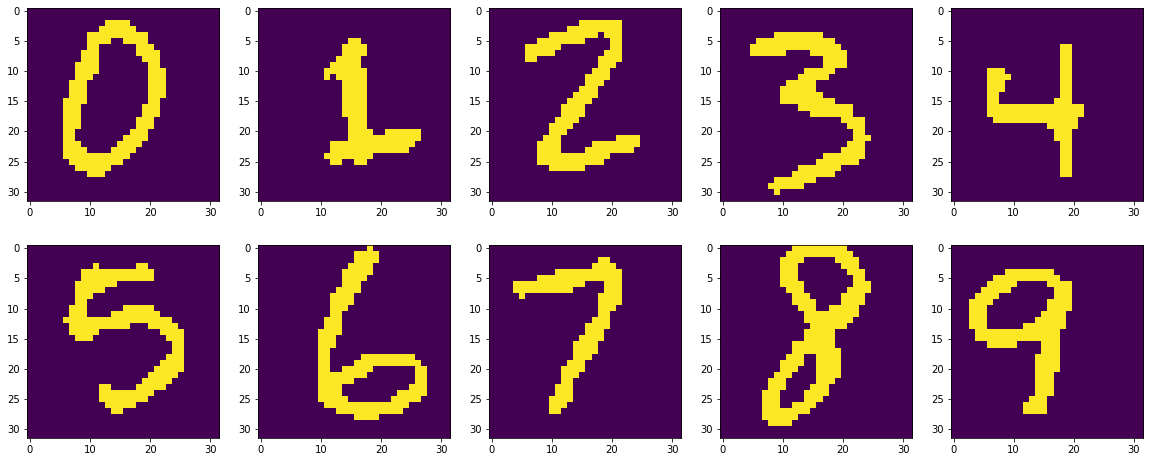

In [130]:
#import the data
p0 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p0.csv')
p1 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p1.csv')
p2 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p2.csv')
p3 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p3.csv')
p4 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p4.csv')
p5 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p5.csv')
p6 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p6.csv')
p7 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p7.csv')
p8 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p8.csv')
p9 = np.loadtxt('../Lab2_2/lab2_2_alldigits/p9.csv')

#convert to 32x32 matrix format
im0 = np.transpose(np.reshape(p0, (32, 32)))
im1 = np.transpose(np.reshape(p1, (32, 32)))
im2 = np.transpose(np.reshape(p2, (32, 32)))
im3 = np.transpose(np.reshape(p3, (32, 32)))
im4 = np.transpose(np.reshape(p4, (32, 32)))
im5 = np.transpose(np.reshape(p5, (32, 32)))
im6 = np.transpose(np.reshape(p6, (32, 32)))
im7 = np.transpose(np.reshape(p7, (32, 32)))
im8 = np.transpose(np.reshape(p8, (32, 32)))
im9 = np.transpose(np.reshape(p9, (32, 32)))


#show images
plt.figure(figsize=(20,8))
plt.subplot(2,5,1)
plt.imshow(im0)
plt.subplot(2,5,2)
plt.imshow(im1)
plt.subplot(2,5,3)
plt.imshow(im2)
plt.subplot(2,5,4)
plt.imshow(im3)
plt.subplot(2,5,5)
plt.imshow(im4)
plt.subplot(2,5,6)
plt.imshow(im5)
plt.subplot(2,5,7)
plt.imshow(im6)
plt.subplot(2,5,8)
plt.imshow(im7)
plt.subplot(2,5,9)
plt.imshow(im8)
plt.subplot(2,5,10)
plt.imshow(im9)


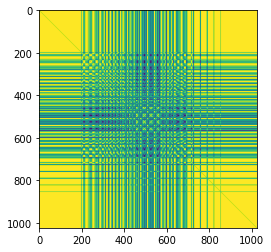

In [131]:
#learn first three digits

size = len(np.outer(p2,p2))

#weight matrix:
w = (1/len(p0))*((np.outer(p0,p0)+np.outer(p1,p1)+np.outer(p2,p2))-3*np.identity(size))

plt.imshow(w)

In [132]:
#function that takes in input a probe image, and the correct memory image it should converge to
def retrieval(probe, img_in, c, num):
    #initialization
    x = np.copy(probe.T.ravel()) #linearize probe image into a vector 

    bias = np.random.normal(0.52, 0.01, size=len(x)) #gaussian bias applied to neurons (mean and std are chosen in order to optimize recall in the following examples)

    #iteration until convergence
    epochs = 100 #max number of epochs

    #arrays to store values of overlaps
    m0_hist = []
    m1_hist = []
    m2_hist = []
    m3_hist = []
    m4_hist = []
    m5_hist = []
    m6_hist = []
    m7_hist = []
    m8_hist = [] 
    m9_hist = [] 


    for N in range (epochs):

        xold = np.copy(x) #store values of neurons in order to compare with next epoch

        i = np.random.permutation(len(x)) #to choose neurons in random order
        for j in i:
            x[j] = np.sign(np.dot(w[j,:], x)+bias[j]) #apply the update equation

            #commpute overlap functions 
            m0 = 1/len(p0)*np.dot(p0,x)
            m1 = 1/len(p1)*np.dot(p1,x)
            m2 = 1/len(p2)*np.dot(p2,x)
            m3 = 1/len(p3)*np.dot(p3,x)
            m4 = 1/len(p4)*np.dot(p4,x)
            m5 = 1/len(p5)*np.dot(p5,x)
            m6 = 1/len(p6)*np.dot(p6,x)
            m7 = 1/len(p7)*np.dot(p7,x)
            m8 = 1/len(p8)*np.dot(p8,x)
            m9 = 1/len(p9)*np.dot(p9,x)

            m0_hist = np.append(m0_hist, m0)
            m1_hist = np.append(m1_hist, m1)
            m2_hist = np.append(m2_hist, m2)
            m3_hist = np.append(m3_hist, m3)
            m4_hist = np.append(m4_hist, m4)
            m5_hist = np.append(m5_hist, m5)
            m6_hist = np.append(m6_hist, m6)
            m7_hist = np.append(m7_hist, m7)
            m8_hist = np.append(m8_hist, m8)
            m9_hist = np.append(m9_hist, m9)


        #if in one epoch no neuron changes its value, stop iterting (fixed point reached)
        if np.array_equal(x, xold):
            print('stop iterating') 
            break

    #make plots
    plt.title('Overlaps')
    t=np.arange(0,len(m0_hist))
    plt.plot(t, m0_hist, label = '0')
    plt.plot(t, m1_hist, label = '1')
    plt.plot(t, m2_hist, label = '2')
    if c > 2:
        plt.plot(t, m3_hist, label = '3')
    if c > 3:
        plt.plot(t, m4_hist, label = '4')
    if c > 4:
        plt.plot(t, m5_hist, label = '5')
    if c > 5:
        plt.plot(t, m6_hist, label = '6')
    if c > 6:
        plt.plot(t, m7_hist, label = '7')
    if c > 7:
        plt.plot(t, m8_hist, label = '8')
    if c > 8:
        plt.plot(t, m9_hist, label = '9')


    plt.xlabel('update #')
    plt.ylabel('Overlap function')

    plt.legend()
    plt.savefig(f'plots_bt2/learned_until_{c}_{num}.pdf')
    plt.show()


    #reconstructed image
    imx = np.transpose(np.reshape(x, (32, 32)))

    #measure ofdiscrepancy (calculate the number of pixel that differ between the reconstructed image and the input pattern)
    d = disc(imx, img_in)
    print(d)


    plt.subplot(1,3,1)
    plt.title(f'Memorized Input')
    plt.imshow(img_in)

    plt.subplot(1,3,2)
    plt.title(f'Perturbed Input')
    plt.imshow(probe)

    plt.subplot(1,3,3)
    plt.title(f'Discrepancy = {d}')
    plt.imshow(imx)
    plt.tight_layout() 
    plt.show()

    return d


0.0498046875


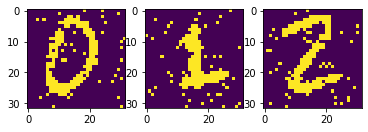

In [133]:
# distort first three images
im0d = distort_image(im0, 0.05)
im1d = distort_image(im1, 0.05)
im2d = distort_image(im2, 0.05)


plt.figure()
plt.subplot(1,3,1)
plt.imshow(im0d)
plt.subplot(1,3,2)
plt.imshow(im1d)
plt.subplot(1,3,3)
plt.imshow(im2d)
plt.show()

stop iterating


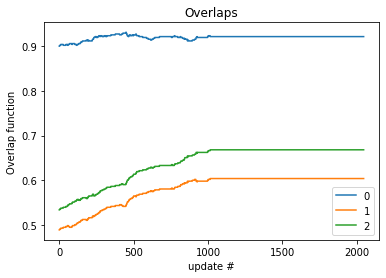

0.0390625


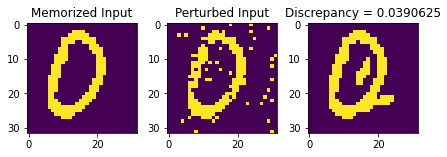

stop iterating


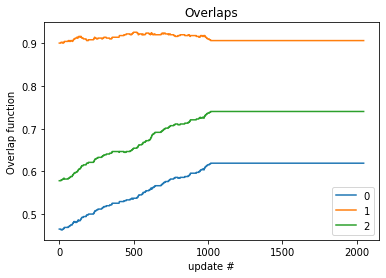

0.046875


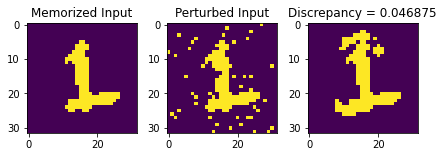

stop iterating


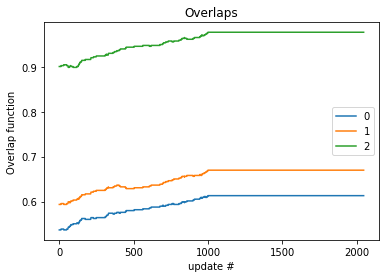

0.01171875


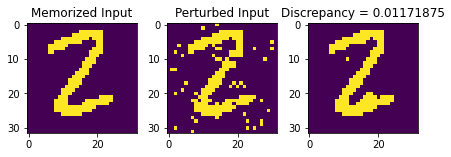

[0.03255208]


In [134]:
avg_discr = []
j = 3
d0 = retrieval(im0d, im0, 2,0)
d1 = retrieval(im1d, im1, 2,1)
d2 = retrieval(im2d, im2, 2,2)

avg_discr = np.append(avg_discr,np.mean([d0,d1,d2]))
print(avg_discr)

In [135]:
# distort remaining images

im3d = distort_image(im3, 0.05)
im4d = distort_image(im4, 0.05)
im5d = distort_image(im5, 0.05)
im6d = distort_image(im6, 0.05)
im7d = distort_image(im7, 0.05)
im8d = distort_image(im8, 0.05)
im9d = distort_image(im9, 0.05)

stop iterating


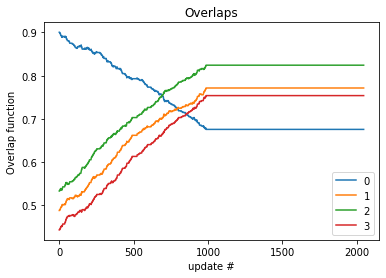

0.162109375


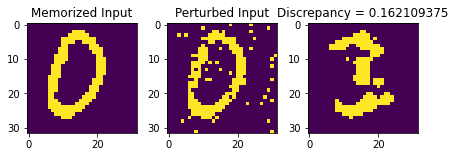

stop iterating


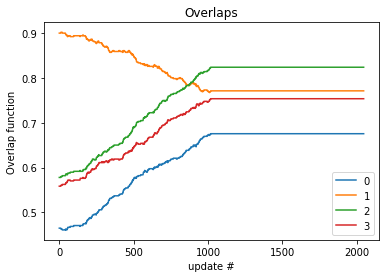

0.1142578125


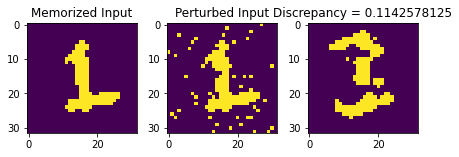

stop iterating


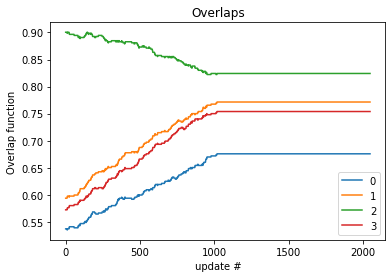

0.087890625


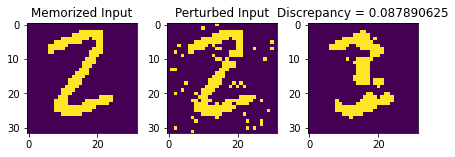

stop iterating


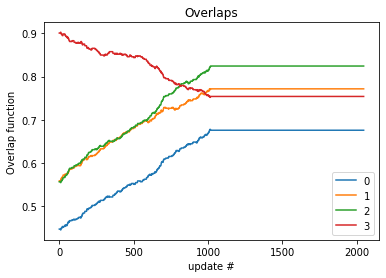

0.123046875


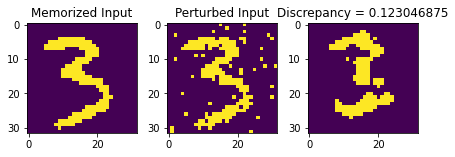

stop iterating


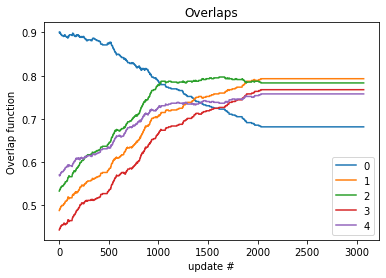

0.1591796875


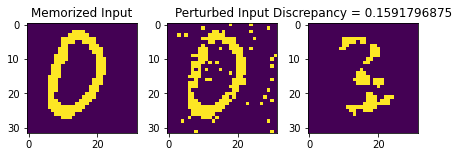

stop iterating


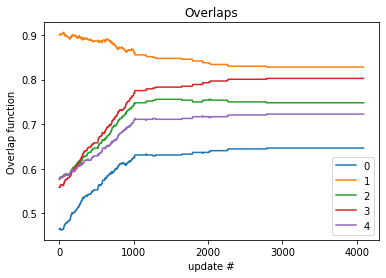

0.0859375


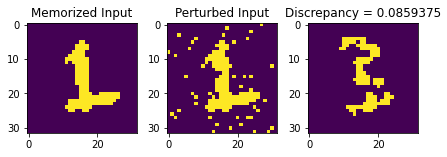

stop iterating


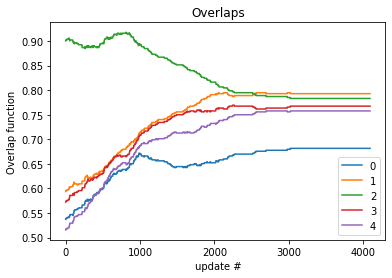

0.1083984375


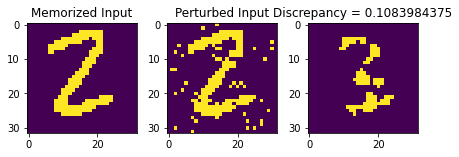

stop iterating


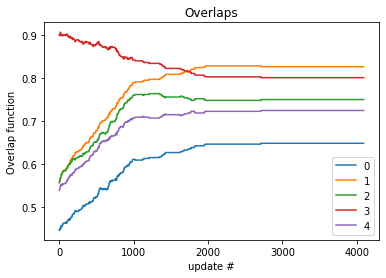

0.099609375


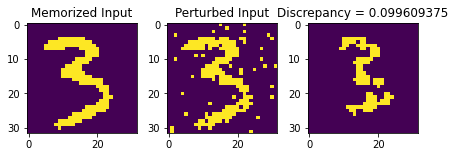

stop iterating


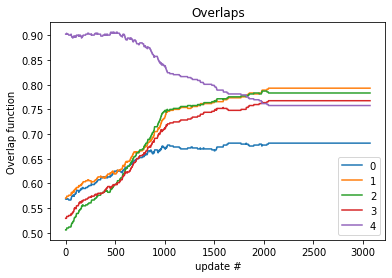

0.12109375


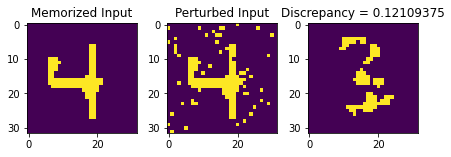

stop iterating


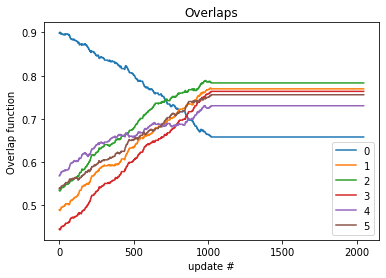

0.1708984375


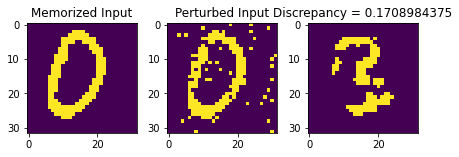

stop iterating


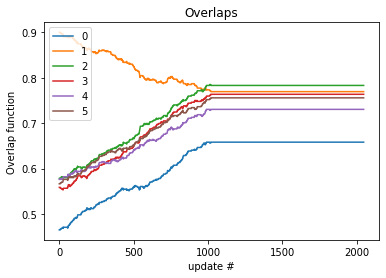

0.115234375


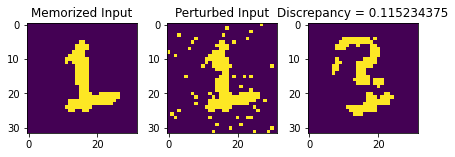

stop iterating


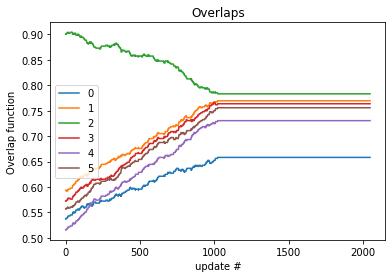

0.1083984375


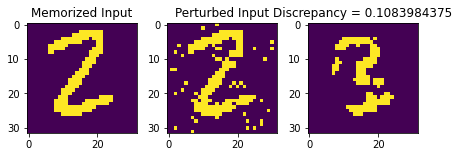

stop iterating


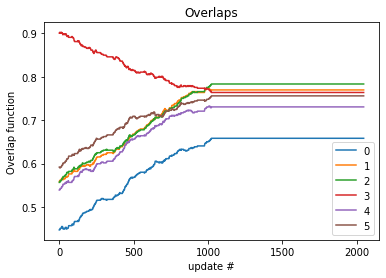

0.1181640625


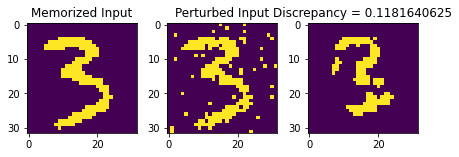

stop iterating


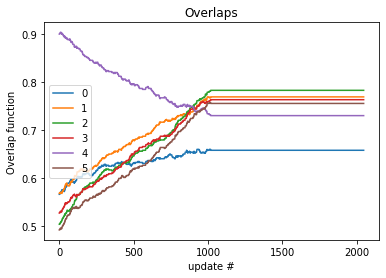

0.134765625


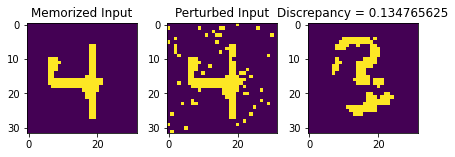

stop iterating


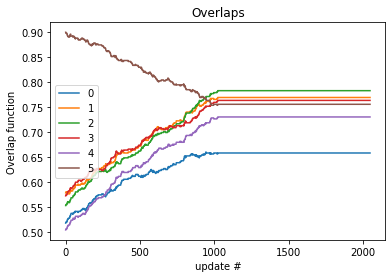

0.1220703125


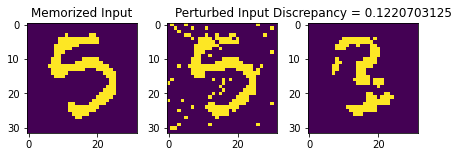

stop iterating


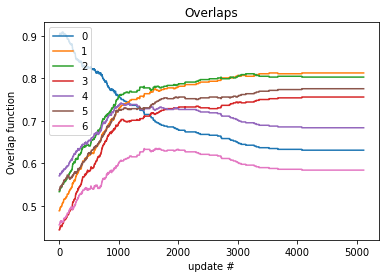

0.1845703125


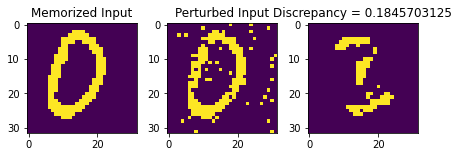

stop iterating


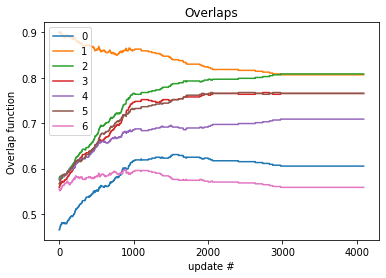

0.0966796875


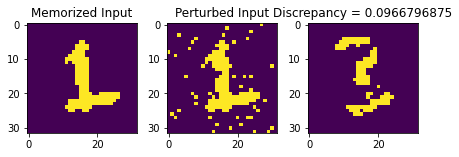

stop iterating


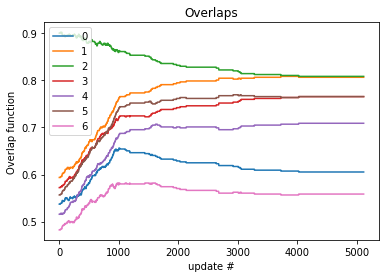

0.095703125


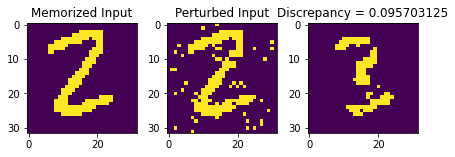

stop iterating


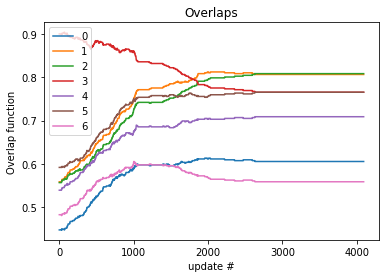

0.1171875


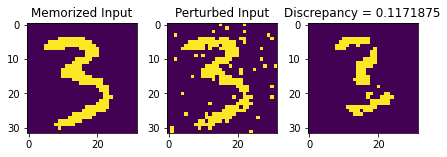

stop iterating


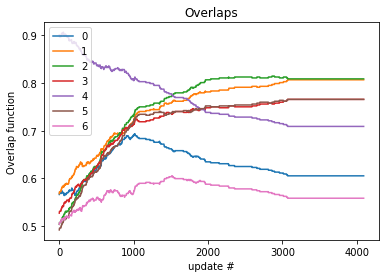

0.1455078125


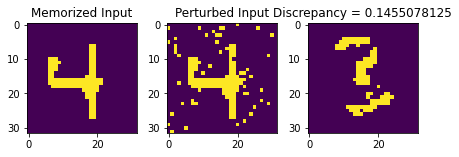

stop iterating


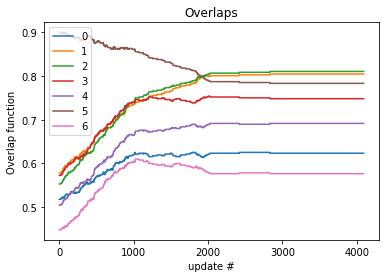

0.1083984375


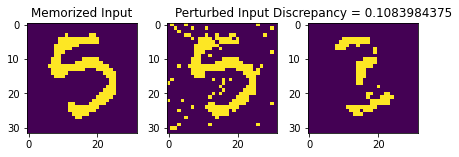

stop iterating


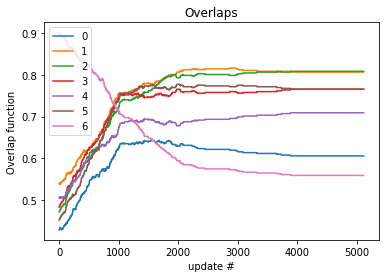

0.220703125


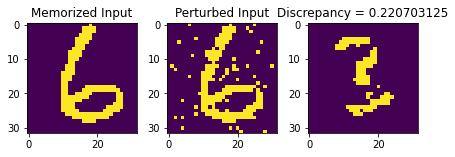

stop iterating


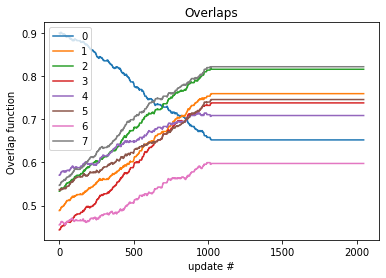

0.173828125


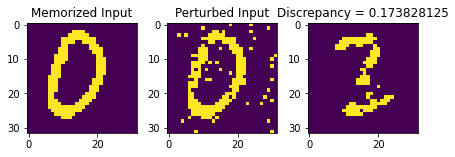

stop iterating


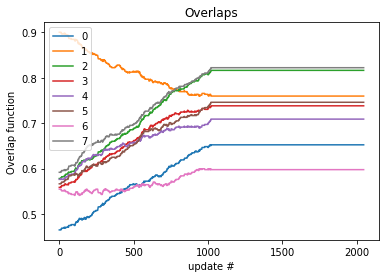

0.1201171875


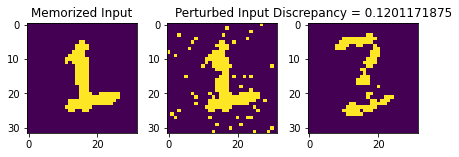

stop iterating


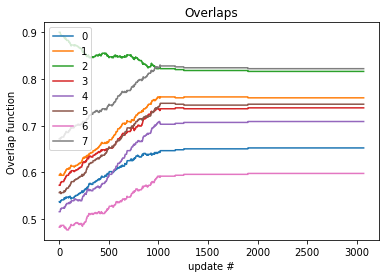

0.091796875


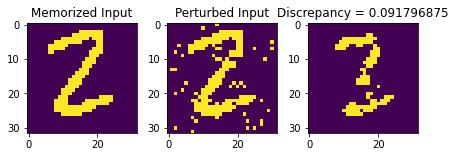

stop iterating


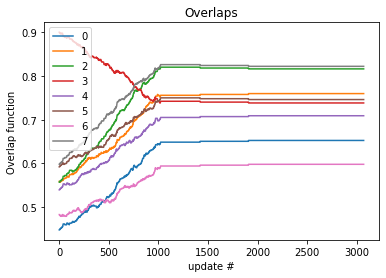

0.130859375


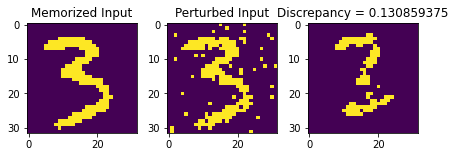

stop iterating


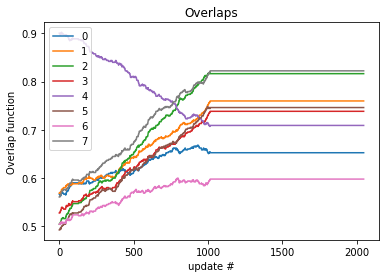

0.1455078125


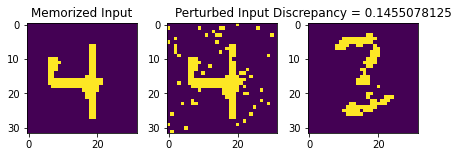

stop iterating


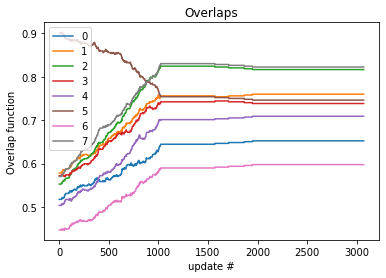

0.126953125


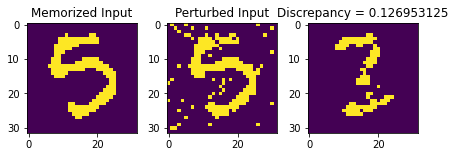

stop iterating


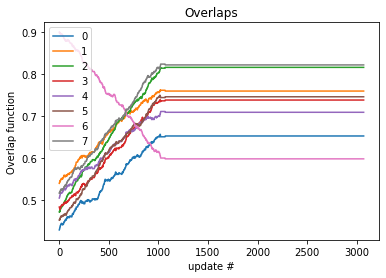

0.201171875


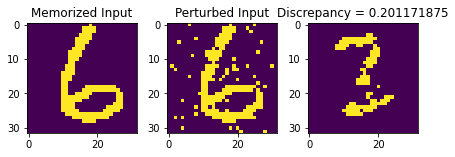

stop iterating


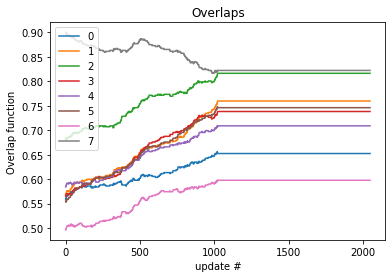

0.0888671875


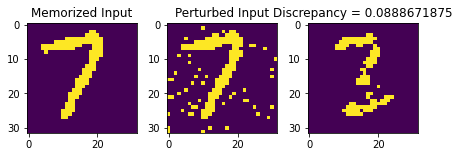

stop iterating


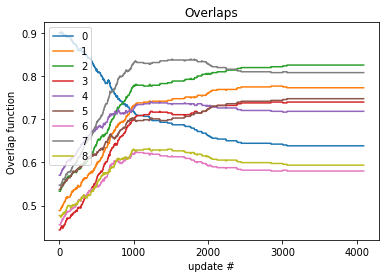

0.1806640625


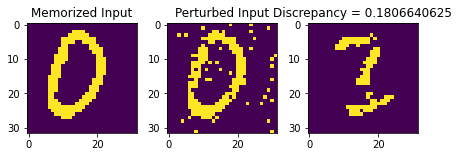

stop iterating


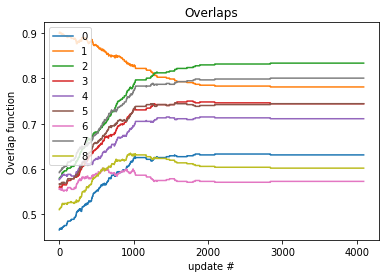

0.109375


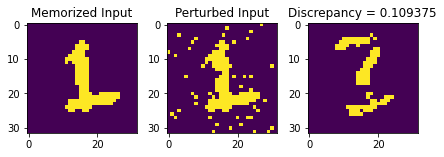

stop iterating


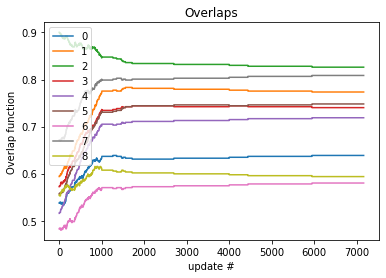

0.0869140625


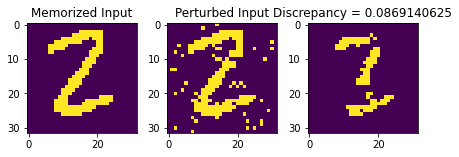

stop iterating


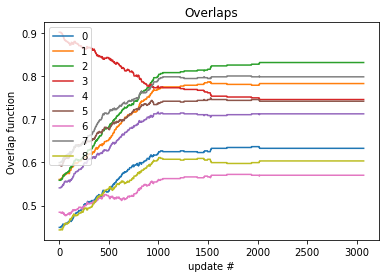

0.126953125


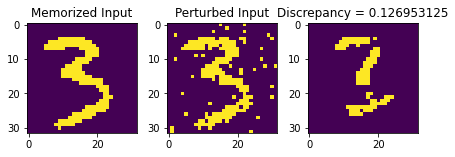

stop iterating


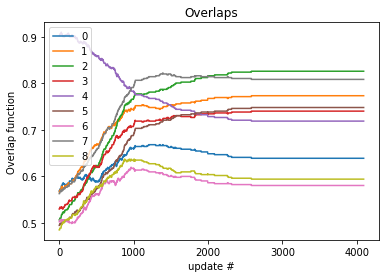

0.140625


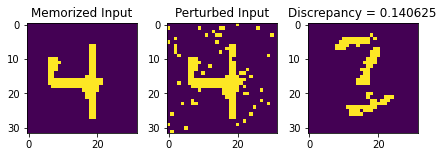

stop iterating


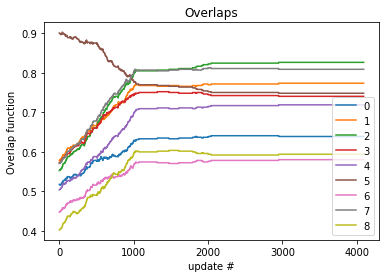

0.1259765625


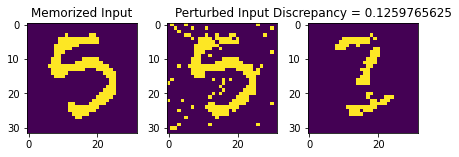

stop iterating


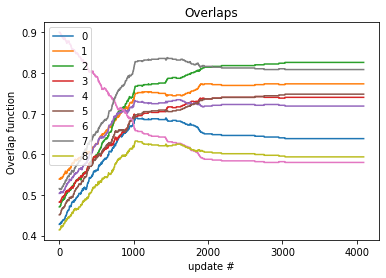

0.2099609375


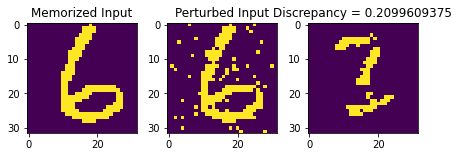

stop iterating


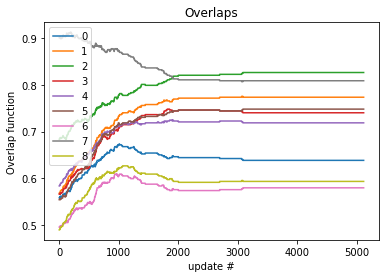

0.095703125


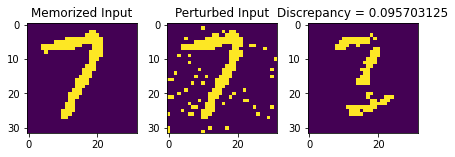

stop iterating


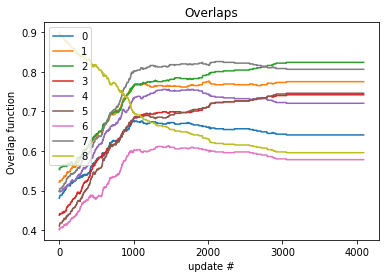

0.2021484375


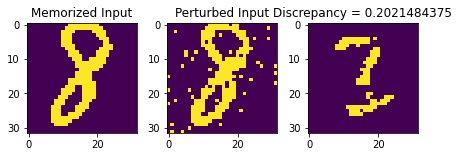

stop iterating


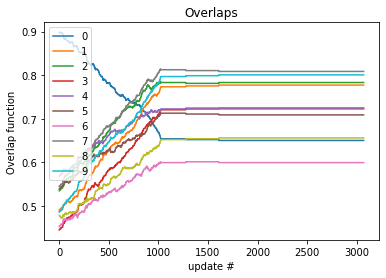

0.1748046875


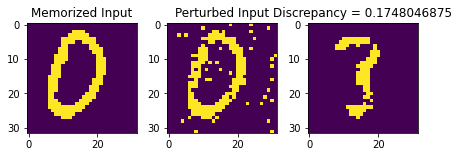

stop iterating


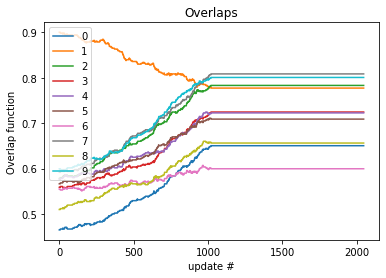

0.111328125


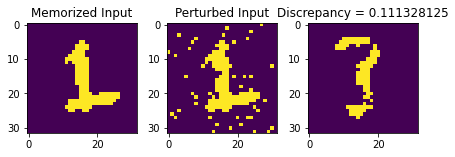

stop iterating


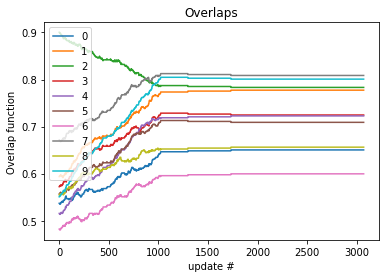

0.1083984375


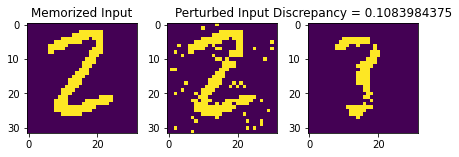

stop iterating


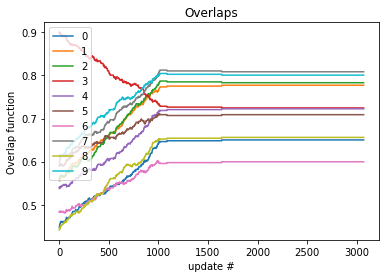

0.1376953125


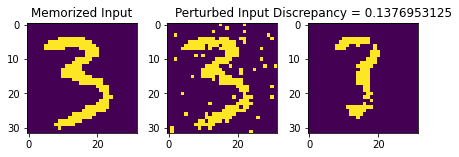

stop iterating


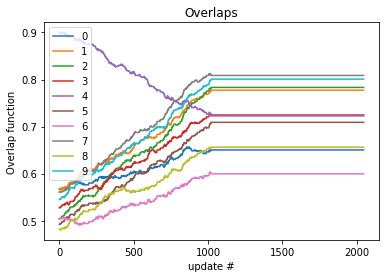

0.138671875


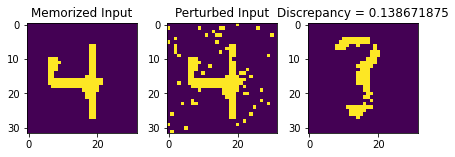

stop iterating


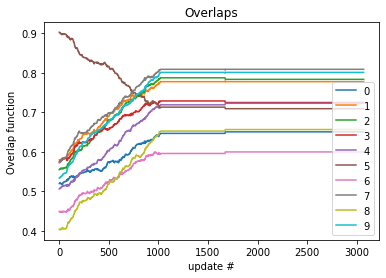

0.1455078125


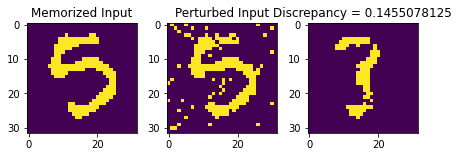

stop iterating


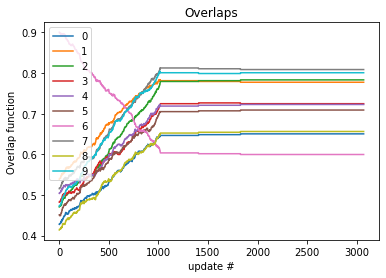

0.2001953125


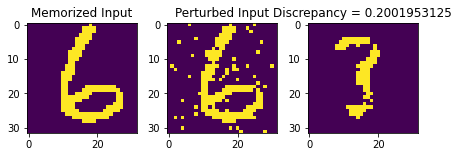

stop iterating


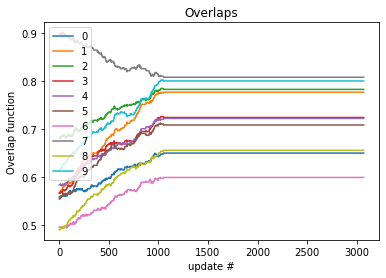

0.095703125


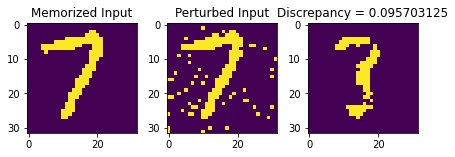

stop iterating


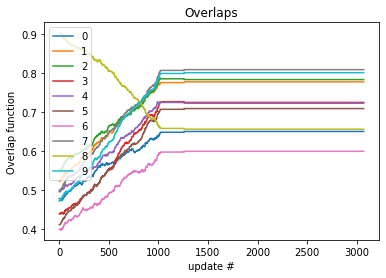

0.171875


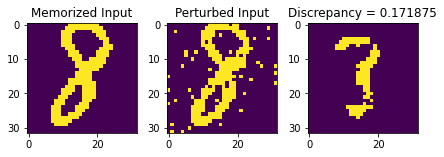

stop iterating


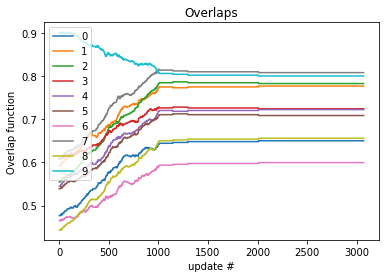

0.099609375


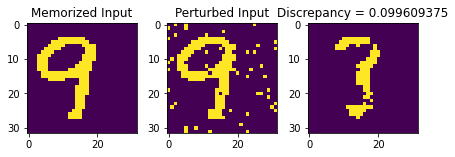

[0.03255208 0.12182617 0.11484375 0.12825521 0.13839286 0.1348877
 0.14203559 0.13837891]


In [136]:
# Learn digit "3"
w = w + (1/len(p0))*((np.outer(p3,p3))-np.identity(size))


d0 = retrieval(im0d, im0, 3,0)
d1 = retrieval(im1d, im1, 3,1)
d2 = retrieval(im2d, im2, 3,2)
d3 = retrieval(im3d, im3, 3,3)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3]))


# Learn digit "4"
w = w + (1/len(p0))*((np.outer(p4,p4))-np.identity(size))


d0 = retrieval(im0d, im0, 4,0)
d1 = retrieval(im1d, im1, 4,1)
d2 = retrieval(im2d, im2, 4,2)
d3 = retrieval(im3d, im3, 4,3)
d4 = retrieval(im4d, im4, 4,4)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4]))



# Learn digit "5"
w = w + (1/len(p0))*((np.outer(p5,p5))-np.identity(size))


d0 = retrieval(im0d, im0, 5,0)
d1 = retrieval(im1d, im1, 5,1)
d2 = retrieval(im2d, im2, 5,2)
d3 = retrieval(im3d, im3, 5,3)
d4 = retrieval(im4d, im4, 5,4)
d5 = retrieval(im5d, im5, 5,5)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5]))

# Learn digit "6"
w = w + (1/len(p0))*((np.outer(p6,p6))-np.identity(size))


d0 = retrieval(im0d, im0, 6,0)
d1 = retrieval(im1d, im1, 6,1)
d2 = retrieval(im2d, im2, 6,2)
d3 = retrieval(im3d, im3, 6,3)
d4 = retrieval(im4d, im4, 6,4)
d5 = retrieval(im5d, im5, 6,5)
d6 = retrieval(im6d, im6, 6,6)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6]))

# Learn digit "7"
w = w + (1/len(p0))*((np.outer(p7,p7))-np.identity(size))


d0 = retrieval(im0d, im0, 7,0)
d1 = retrieval(im1d, im1, 7,1)
d2 = retrieval(im2d, im2, 7,2)
d3 = retrieval(im3d, im3, 7,3)
d4 = retrieval(im4d, im4, 7,4)
d5 = retrieval(im5d, im5, 7,5)
d6 = retrieval(im6d, im6, 7,6)
d7 = retrieval(im7d, im7, 7,7)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7]))


# Learn digit "8"
w = w + (1/len(p0))*((np.outer(p8,p8))-np.identity(size))


d0 = retrieval(im0d, im0, 8,0)
d1 = retrieval(im1d, im1, 8,1)
d2 = retrieval(im2d, im2, 8,2)
d3 = retrieval(im3d, im3, 8,3)
d4 = retrieval(im4d, im4, 8,4)
d5 = retrieval(im5d, im5, 8,5)
d6 = retrieval(im6d, im6, 8,6)
d7 = retrieval(im7d, im7, 8,7)
d8 = retrieval(im8d, im8, 8,8)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7,d8]))


# Learn digit "9"
w = w + (1/len(p0))*((np.outer(p9,p9))-np.identity(size))


d0 = retrieval(im0d, im0, 9,0)
d1 = retrieval(im1d, im1, 9,1)
d2 = retrieval(im2d, im2, 9,2)
d3 = retrieval(im3d, im3, 9,3)
d4 = retrieval(im4d, im4, 9,4)
d5 = retrieval(im5d, im5, 9,5)
d6 = retrieval(im6d, im6, 9,6)
d7 = retrieval(im7d, im7, 9,7)
d8 = retrieval(im8d, im8, 9,8)
d9 = retrieval(im9d, im9, 9,9)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]))

print(avg_discr)



[ 3  4  5  6  7  8  9 10]


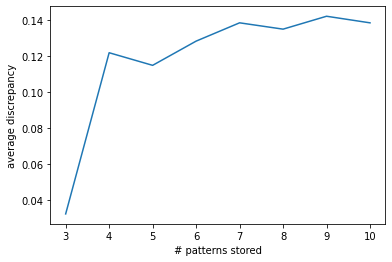

In [137]:
plt.figure()
x = np.arange(3,3+len(avg_discr))
print(x)
plt.plot(x, avg_discr)
plt.xlabel('# patterns stored')
plt.ylabel('average discrepancy')
plt.savefig('plots_bt2/discrepancy.pdf')
